In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy
import scipy.stats
import tqdm
import scipy.signal
import datetime
import pywt
import heapq

In [2]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [3]:
def movstd(ts, window_size):
    return np.std(rolling_window(ts, window_size), axis=1)

def mass(ts, q, mstd, eps=1e-8):
    window_size = q.shape[0]
    dots = scipy.signal.fftconvolve(ts, q[::-1], mode='valid')
    dist = np.sqrt(np.abs(2 * (window_size - np.divide(dots, mstd+0.0001))))
    return dist

def stamp(ts, windows, mode='full'):
    window_size = windows.shape[1]
    windows_count = windows.shape[0]
    matrix_profile = np.zeros(windows_count) + np.inf
    matrix_profile_index = -np.ones_like(matrix_profile, dtype=np.int32)
    mstd = movstd(ts, window_size)
    
    if type(mode) is str and mode == 'full':
        end_value = windows_count
    elif type(mode) is float:
        end_value = int(mode * windows_count)
    elif type(mode) is int:
        end_value = mode
    else:
        raise ValueError
    
    for i in tqdm.tqdm_notebook(np.random.permutation(windows_count)[:end_value]):
        d = mass(ts, windows[i], mstd)
        d[max(int(i - window_size / 4), 0):min(int(i + window_size / 4 - 1), windows_count)] = np.inf
        matrix_profile_index[np.where(d <= matrix_profile)] = i
        matrix_profile = np.minimum(matrix_profile, d)
        
    return matrix_profile, matrix_profile_index

In [4]:
ts = pd.read_csv(
    './2018/ciscoRouter/interfaces/62.183.0.38/62.183.0.38.inUtilization.104',
    sep=',',
    encoding='utf-8',
    names=['timestamp', 'in']
)

In [5]:
ts = pd.Series(data=ts['in'].values, index=ts['timestamp'].values)

In [6]:
ts.index = list(map(lambda x: datetime.datetime.fromtimestamp(x/1000000),ts.index.values))

In [7]:
index = ts.resample('5T').mean().index.values
ff = ts.resample('5T').mean().interpolate('linear')

In [8]:
ff = pd.Series(data=ff.values, index=index)

In [ ]:
# fts = scipy.signal.medfilt(ff, 5)

In [ ]:
# ff = pd.Series(data=fts, index=index)

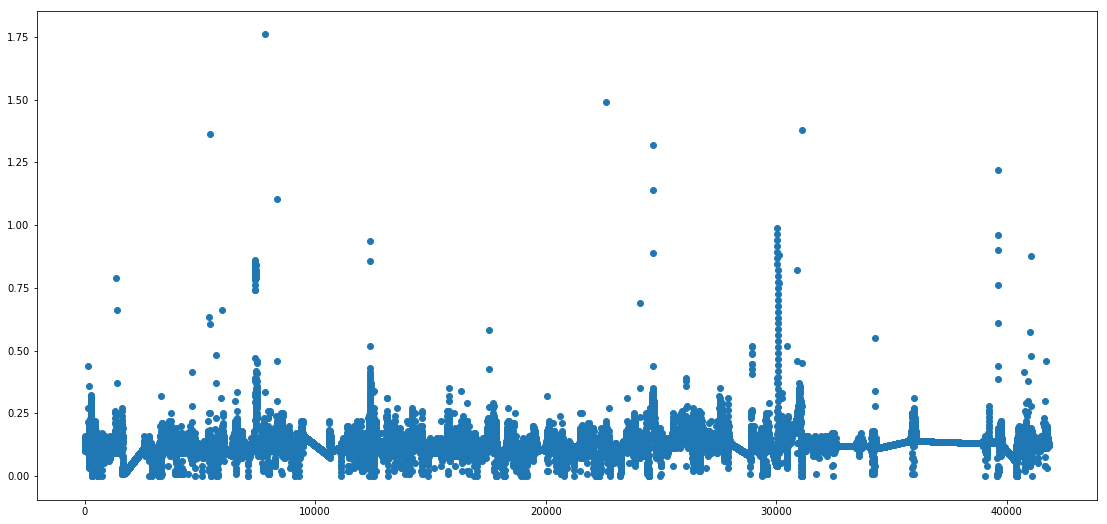

In [10]:
plt.figure(figsize=(19,9))
plt.scatter(range(ff.shape[0]), ff.values);

In [ ]:
plt.scatter(range(ff[:300].shape[0]), ff.values[:300], label='ff')

# tsfresh

In [12]:
from tsfresh import extract_relevant_features, extract_features

In [17]:
df = pd.DataFrame()
df['ix'] = ff.index.values
df['val'] = ff.values

In [29]:
df.shape

(41813, 2)

In [30]:
%%time
relevant_features = extract_features(df, column_id='ix')

# extraction_settings = FeatureExtractionSettings()
# extraction_settings.IMPUTE = impute
# extracted_features = extract_features(df, feature_extraction_settings=extraction_settings, column_id='id',
#                                       column_value='val', column_kind='kind', column_sort='sort')
# selected_features = select_features(extracted_features, y)




Feature Extraction:   0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [28]:
relevant_features.T

id,2017-09-13 18:45:00,2017-09-13 18:50:00,2017-09-13 18:55:00,2017-09-13 19:00:00,2017-09-13 19:05:00,2017-09-13 19:10:00,2017-09-13 19:15:00,2017-09-13 19:20:00,2017-09-13 19:25:00,2017-09-13 19:30:00,...,2017-09-14 02:15:00,2017-09-14 02:20:00,2017-09-14 02:25:00,2017-09-14 02:30:00,2017-09-14 02:35:00,2017-09-14 02:40:00,2017-09-14 02:45:00,2017-09-14 02:50:00,2017-09-14 02:55:00,2017-09-14 03:00:00
variable,,,,,,,,,,,,,,,,,,,,,
val__abs_energy,0.0196,0.0169,0.0196,0.0144,0.0256,0.0225,0.0196,0.0169,0.0144,0.0121,...,0.011616,0.011857,0.0121,0.01,0.010678,0.011378,0.0121,0.01,0.0121,0.011025
val__absolute_sum_of_changes,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.0000,0.00,0.0000,0.000000
"val__agg_autocorrelation__f_agg_""mean""",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.0000,0.00,0.0000,0.000000
"val__agg_autocorrelation__f_agg_""median""",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.0000,0.00,0.0000,0.000000
"val__agg_autocorrelation__f_agg_""var""",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.0000,0.00,0.0000,0.000000
"val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
window_size=12*12
x_roll = rolling_window(ff, window_size).squeeze()
xw_mean = np.mean(x_roll, axis=1)
xw_std = np.std(x_roll, axis=1)
x_windows = np.divide(x_roll - xw_mean[:, np.newaxis], xw_std[:, np.newaxis]+0.0001)

MP, MPI = stamp(ff, x_windows, mode='full')

In [ ]:
index = 300
i = 0
plt.figure(figsize=(19,9))
plt.title('Matrix profile представление и исходный временной ряд')
plt.scatter(range(ff[i:index].shape[0]), 3*ff.values[i:index]+3, label='ts')
plt.plot(range(MP[i:index].shape[0]), MP[i:index], 'g--', label='MP');
plt.legend();

In [ ]:
sorted_ix = np.argpartition(MP, np.argmin(MP))

In [ ]:
np.argmin(MP)

In [ ]:
MP[np.argmin(MP)]

In [ ]:
MPI[np.argmin(MP)]

In [ ]:
MP[MPI[np.argmin(MP)]]

In [ ]:
plt.scatter(range(MP[sorted_ix].shape[0]), MP[sorted_ix])

In [ ]:
ix = np.argmin(MP)
ixs = []
ixx = ix
ixs.append(ixx)
while True:
    ixx = MPI[ixx]
    if ixx not in ixs:
        ixs.append(ixx)
    else:
        break

In [ ]:
ixs

In [ ]:
ixs_max = heapq.nlargest(3, range(len(MP)), MP.take)

In [ ]:
for ix in ixs:
    plt.plot(ff.values[ix:ix+window_size], label=ix)
plt.legend()

In [ ]:
for ix in ixs_max:
    plt.plot(ff.values[ix:ix+window_size], label=ix)
plt.legend()

In [ ]:
plt.plot(ff.values)
for ix in ixs[:]:
    plt.plot(range(ix,ix+window_size), ff.values[ix:ix+window_size], c='y')
for ix in ixs_max[:]:
    plt.plot(range(ix,ix+window_size), ff.values[ix:ix+window_size], c='r')

In [ ]:
coeff , freq = pywt.cwt(ff, np.arange(1,30), 'gaus1')

In [ ]:
coeff.shape[1]

In [ ]:
y = np.arange(0,coeff.shape[0])
x = np.arange(0,coeff.shape[1])
z = coeff

In [ ]:
z[:3,:3]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
%matplotlib inline

# %matplotlib notebook
fig = plt.figure(figsize=(17,10))
ax = fig.gca(projection='3d')

rng = np.arange(0,300)
X, Y = np.meshgrid(x[rng], y)
Z = z[:,rng]

surf = ax.plot_surface(X,Y,Z, cmap='viridis',
                       linewidth=0)

# Customize the z axis.
# ax.set_zlim(-4.001, 4.001)
ax.set_xlim(rng[0], rng[-1])
# ax.set_ylim(0, 59)
ax.set_xlabel('time')
ax.set_ylabel('scale')
ax.set_zlabel('amplitude')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

In [ ]:
def get_x_windows(ts, window_size=12):
    x_roll = rolling_window(ts, window_size).squeeze()
    xw_mean = np.mean(x_roll, axis=1)
    xw_std = np.std(x_roll, axis=1)
    x_windows = np.divide(x_roll - xw_mean[:, np.newaxis], xw_std[:, np.newaxis])

In [ ]:
def get_samples_for_clustering(X, data, attrs, cluster_num, typo, window_size=12):
    samples = None
    df = data[X.cls == cluster_num]
    for mod in df['model'].unique():
        for ip in df['ip'].unique():
            ts = attrs[mod][ip][typo]['ts']
            if samples is None:
                samples = get_x_windows(ts,window_size)
            else:
                samples = np.append(samples, get_x_windows(ts,window_size), axis=0)
    return samples   
    

In [ ]:
x_windows.shape

In [ ]:
15639+ 15639

In [ ]:
aa = np.append(x_windows, x_windows, axis=0)

In [ ]:
aa.shape